In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


## Importing the libraries

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

## Importing the datasets

In [3]:
df_train = pd.read_csv('../input/titanic/train.csv')
df_test = pd.read_csv('../input/titanic/test.csv')

## Merging the training and test Data

In [4]:
df = df_train.append(df_test)

## Exploratory Data Analysis

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


### Checking correlation between variables

<AxesSubplot:>

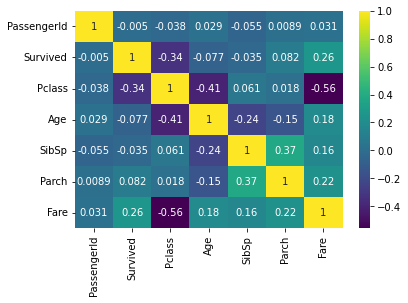

In [8]:
sns.heatmap(df.corr(),annot=True,cmap='viridis')

### Distribution of Age onboard

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

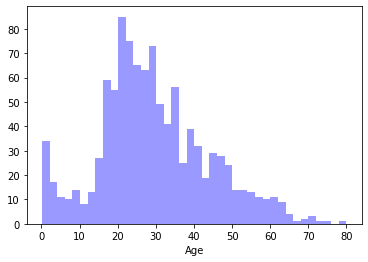

In [9]:
sns.distplot(df['Age'],kde=False,bins=40,color='blue')

### Number of people who boarded from different places

([<matplotlib.patches.Wedge at 0x7fcc618bb410>,
 [Text(-0.6446370360990115, 0.8913153716218979, 'S'),
  Text(0.3569718177241597, -1.0404667805128183, 'C'),
  Text(1.0522738772050793, -0.32049912223247967, 'Q')],
 [Text(-0.35162020150855167, 0.48617202088467154, '69.93%'),
  Text(0.19471190057681437, -0.5675273348251736, '20.66%'),
  Text(0.5739675693845886, -0.17481770303589797, '9.41%')])

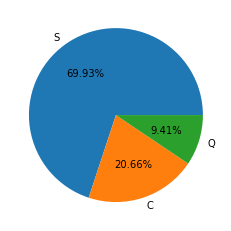

In [11]:
place_names = df['Embarked'].value_counts().index
place_values = df['Embarked'].value_counts().values
plt.pie(place_values,labels=place_names,autopct='%1.2f%%')

### Number of Males and females onboard

<AxesSubplot:xlabel='Sex', ylabel='count'>

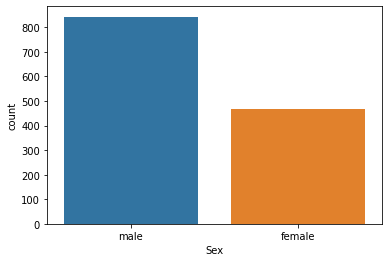

In [12]:
sns.countplot(x='Sex',data=df)

### Number of people survived based on sex

<AxesSubplot:xlabel='Survived', ylabel='count'>

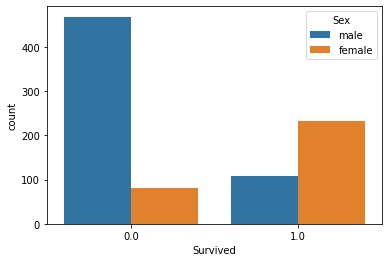

In [13]:
sns.countplot(x='Survived',data=df,hue=df['Sex'])

### Number of people survived based on Passenger class

<AxesSubplot:xlabel='Survived', ylabel='count'>

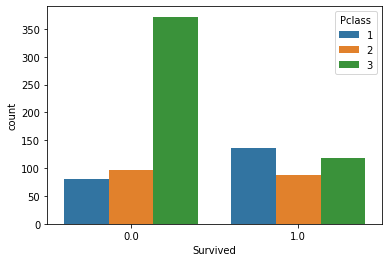

In [14]:
sns.countplot(x='Survived',data=df,hue=df['Pclass'])

## Feature Engineering

### Checking null values

In [15]:
df.shape

(1309, 12)

In [16]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

### Heatmap of Null Values

<AxesSubplot:>

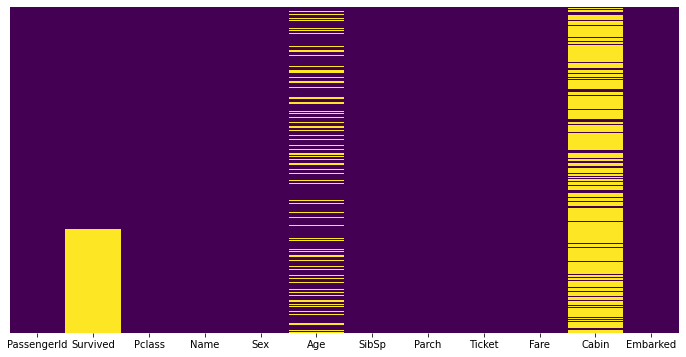

In [17]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12,6)
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Dropping the Cabin Column

In [ ]:
df.drop(['Cabin'],axis=1,inplace=True)

In [20]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### Dropping the Passenger ID Column

In [21]:
df.drop(['PassengerId'],axis=1,inplace=True)

In [22]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### Filling missing values in Age with median

In [23]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [24]:
df.isnull().sum()

Survived    418
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          1
Embarked      2
dtype: int64

### Dropping Ticket column

In [25]:
df.drop(['Ticket'],axis=1,inplace=True)

In [26]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


### Dropping Name Column

In [27]:
df.drop(['Name'],axis=1,inplace=True)

In [28]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3,male,22.0,1,0,7.2500,S
1,1.0,1,female,38.0,1,0,71.2833,C
2,1.0,3,female,26.0,0,0,7.9250,S
3,1.0,1,female,35.0,1,0,53.1000,S
4,0.0,3,male,35.0,0,0,8.0500,S


### Encoding categorical column "Embarked"

In [38]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [39]:
df['Embarked'].mode()

0    S
dtype: object

In [40]:
def embark(row):
    if row =='S':
        return 0
    elif row =='C':
        return 1
    elif row =='Q':
        return 2
    else:
        return 0
df['Embarked'] = df['Embarked'].apply(embark)

In [41]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3,1,22.0,1,0,7.2500,0
1,1.0,1,0,38.0,1,0,71.2833,1
2,1.0,3,0,26.0,0,0,7.9250,0
3,1.0,1,0,35.0,1,0,53.1000,0
4,0.0,3,1,35.0,0,0,8.0500,0


In [42]:
df.isnull().sum()

Survived    418
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

### Filling missing value in Fare column with median

In [34]:
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

### Encoding the categorical column Sex

In [35]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [36]:
def sexchange(row):
    if row == 'male':
        return 1
    else:
        return 0
df['Sex'] = df['Sex'].apply(sexchange)

In [43]:
df.isnull().sum()

Survived    418
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Sex       1309 non-null   int64  
 3   Age       1309 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Fare      1309 non-null   float64
 7   Embarked  1309 non-null   int64  
dtypes: float64(3), int64(5)
memory usage: 124.3 KB


In [47]:
df_train1 = df[~df['Survived'].isnull()]
df_test1 = df[df['Survived'].isnull()]

In [48]:
df_test1.shape

(418, 8)

In [49]:
df_train1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3,1,22.0,1,0,7.2500,0
1,1.0,1,0,38.0,1,0,71.2833,1
2,1.0,3,0,26.0,0,0,7.9250,0
3,1.0,1,0,35.0,1,0,53.1000,0
4,0.0,3,1,35.0,0,0,8.0500,0


In [50]:
df_test1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,NaN,3,1,34.5,0,0,7.8292,2
1,NaN,3,0,47.0,1,0,7.0000,0
2,NaN,2,1,62.0,0,0,9.6875,2
3,NaN,3,1,27.0,0,0,8.6625,0
4,NaN,3,0,22.0,1,1,12.2875,0


In [51]:
df_test1 = df_test1.drop('Survived', axis = 1)
df_test1.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,2
1,3,0,47.0,1,0,7.0000,0
2,2,1,62.0,0,0,9.6875,2
3,3,1,27.0,0,0,8.6625,0
4,3,0,22.0,1,1,12.2875,0


In [52]:
X = df_train1.drop('Survived', axis = 1)
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,0
1,1,0,38.0,1,0,71.2833,1
2,3,0,26.0,0,0,7.9250,0
3,1,0,35.0,1,0,53.1000,0
4,3,1,35.0,0,0,8.0500,0


In [53]:
y = df_train1['Survived']
y.head()

0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: Survived, dtype: float64

## Splitting into train and test set

In [55]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [56]:
len(X_train)

596

In [57]:
len(y_train)

596

In [59]:
len(X_test)

295

In [60]:
len(y_test)

295

## Feature Scaling

In [61]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training Logistic Regression Classifier

In [62]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [63]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[153  22]
 [ 33  87]]


0.8135593220338984

In [64]:
accuracies = cross_val_score(estimator=classifier , X=X_train , y=y_train , cv=10)
print('Accuracy: {:.2f} %'.format(accuracies.mean()*100))
print('Standard deviation: {:.2f} %'.format(accuracies.std()*100))

Accuracy: 79.19 %
Standard deviation: 7.80 %


In [65]:
param_grid = {"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
grid = GridSearchCV(classifier, param_grid, refit = True, verbose = 3, cv=10)
grid.fit(X_train, y_train)

Fitting 10 folds for each of 14 candidates, totalling 140 fits
[CV 1/10] END ................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 2/10] END ................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 3/10] END ................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 4/10] END ................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 5/10] END ................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 6/10] END ................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 7/10] END ................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 8/10] END ................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 9/10] END ................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 10/10] END ...............C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 1/10] END ..............C=0.001, penalty=l2;, score=0.633 total time=   0.0s
[CV 2/10] END ..............C=0.001, penalty=l

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
70 fits failed out of a total of 140.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solve

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=0),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']},
             verbose=3)

In [66]:
print(grid.best_params_)
print(grid.best_estimator_)

{'C': 0.01, 'penalty': 'l2'}
LogisticRegression(C=0.01, random_state=0)


In [67]:
classifier = LogisticRegression(C=0.01, penalty='l2', random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=0.01, random_state=0)

In [68]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[161  14]
 [ 42  78]]


0.8101694915254237

In [70]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [71]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[153  22]
 [ 33  87]]


0.8135593220338984

In [73]:
pred_out = classifier.predict(sc.transform(df_test1))
pred_out

array([0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1.,
       0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [74]:
len(pred_out)

418

In [76]:
len(df_test.PassengerId)

418

In [78]:
output = pd.DataFrame({'PassengerId': df_test.PassengerId, 'Survived': pred_out})
output.head(20)
output.to_csv('Titanic_Survival_submission.csv', index=False)